#### 1# Install and Load Required Packages

In [77]:
# Load the packages
library(ecospat)
library(sf)
library(raster)
library(ggplot2)

#### 2# Load My Data

In [78]:
# Load point shapefile
obs_points <- st_read("E:/Working/Sam/Experiment/Data/Bohemian/Non_Alps_Thinned_plant_point_800m.shp")

# Load the raster result from the model
model_raster <- raster("bohemian_prediction.grd")

Reading layer `Non_Alps_Thinned_plant_point_800m' from data source 
  `E:\Working\Sam\Experiment\Data\Bohemian\Non_Alps_Thinned_plant_point_800m.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 50 features and 3 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 13.12 ymin: 48.73706 xmax: 13.92109 ymax: 49.12494
Geodetic CRS:  WGS 84


#### 3# Extract Raster Values at Point Locations

In [79]:
# Extract raster values at observation points
extracted_values <- extract(model_raster, st_coordinates(obs_points))

# To DF
data <- data.frame(value = extracted_values)
# print(data$value)
print(model_raster)

class      : RasterLayer 
dimensions : 76, 142, 10792  (nrow, ncol, ncell)
resolution : 0.008333333, 0.008333333  (x, y)
extent     : 12.90833, 14.09167, 48.65833, 49.29167  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
source     : bohemian_prediction.grd 
names      : layer 
values     : 3.379381e-06, 0.0006153122  (min, max)



#### 4# Calculate Feature Value of Background

In [80]:
background_value <- cellStats(model_raster, stat = 'mean')
print(background_value)

[1] 8.702191e-05


#### 5# Calculate the Boyce Index

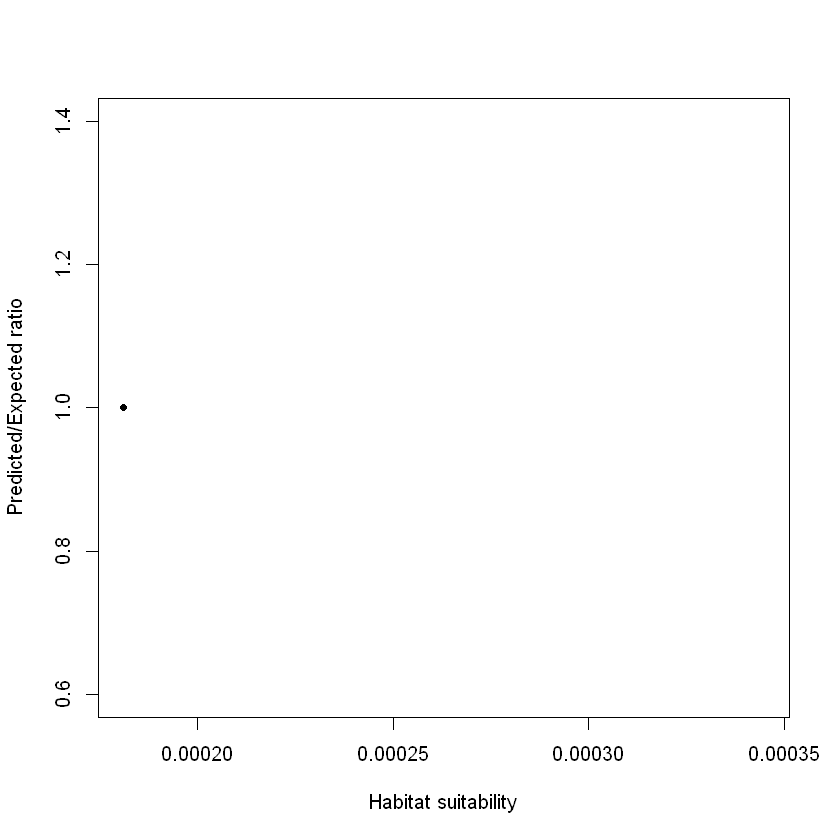

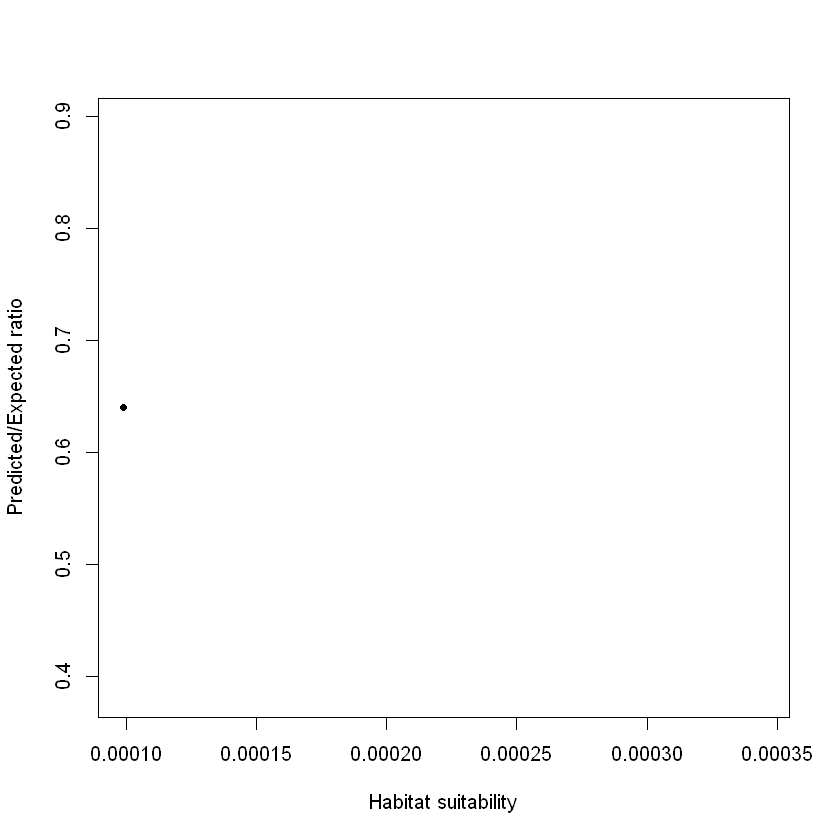

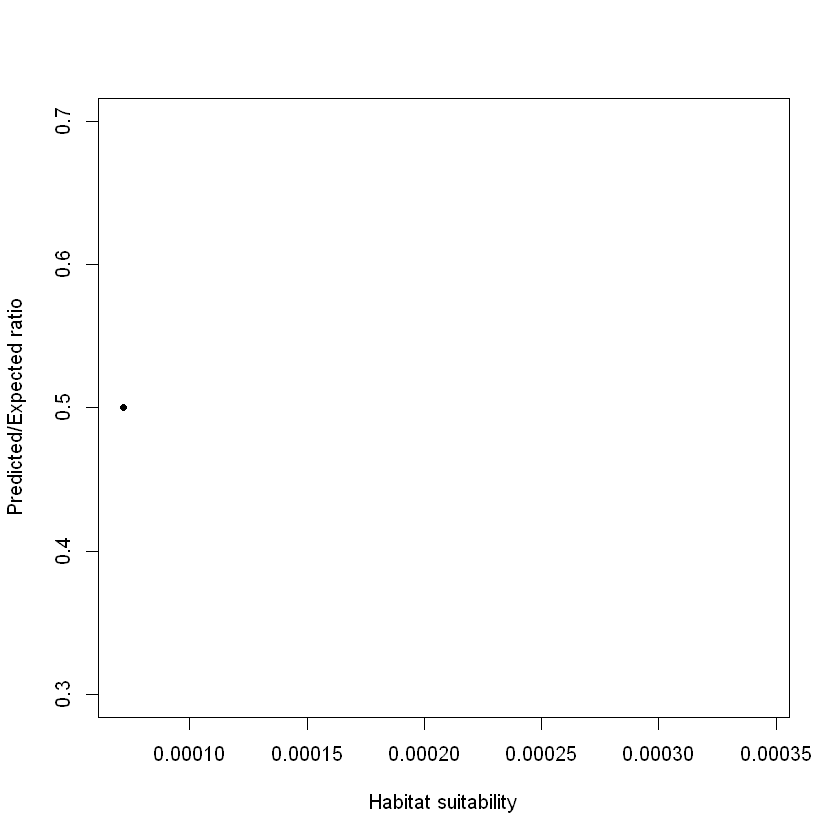

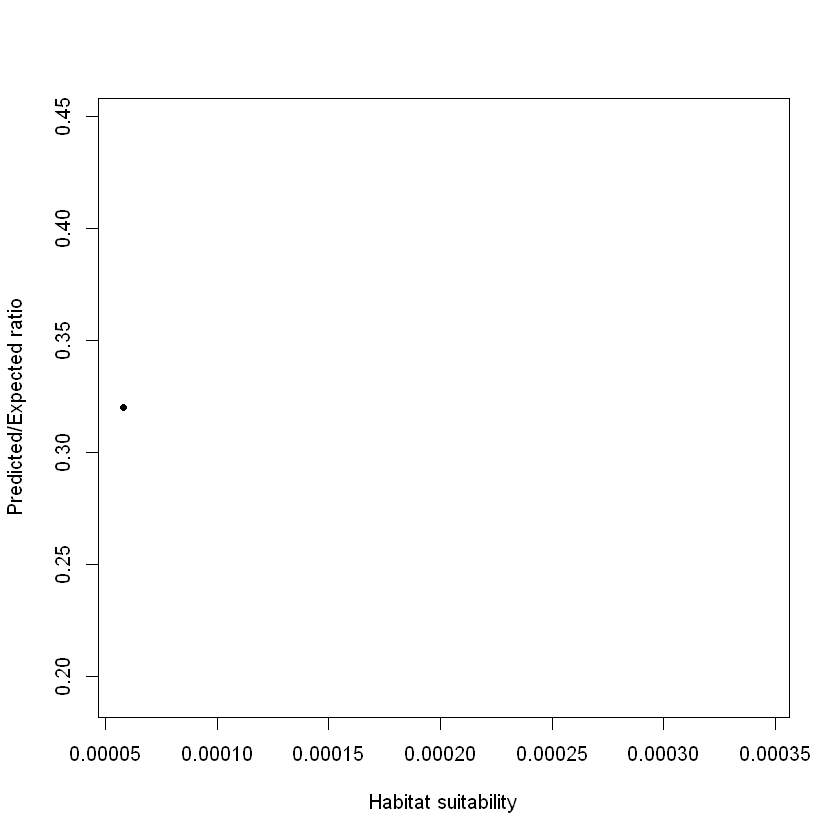

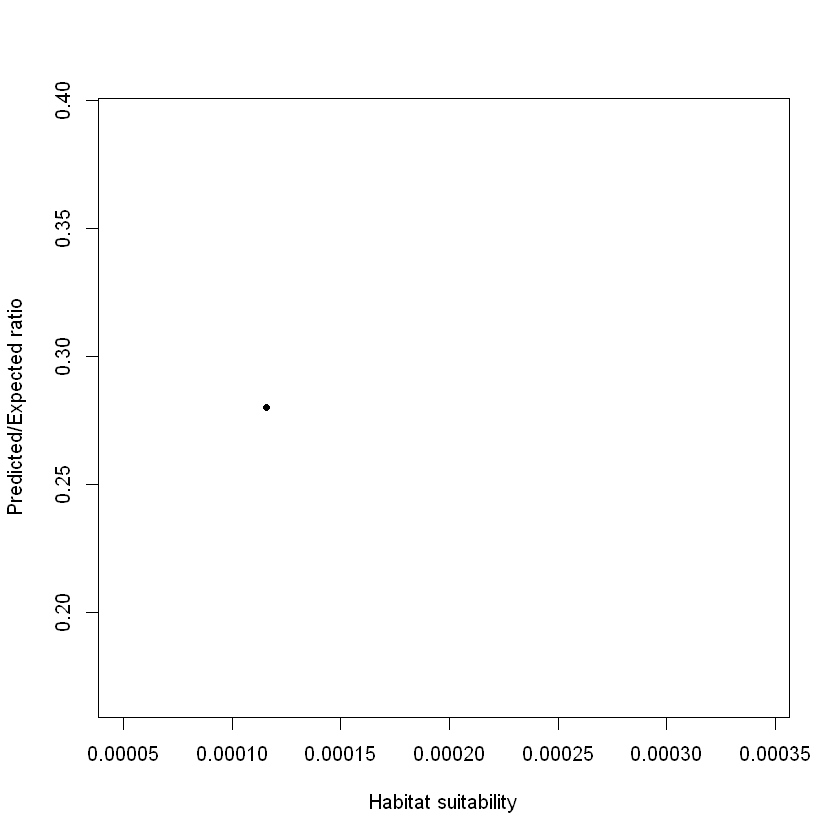

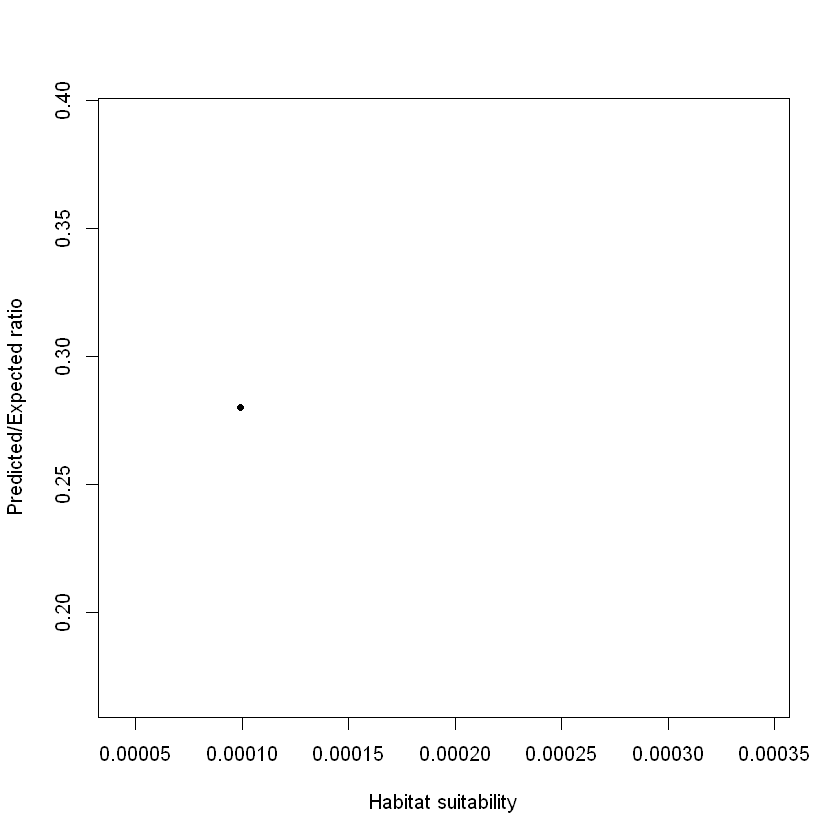

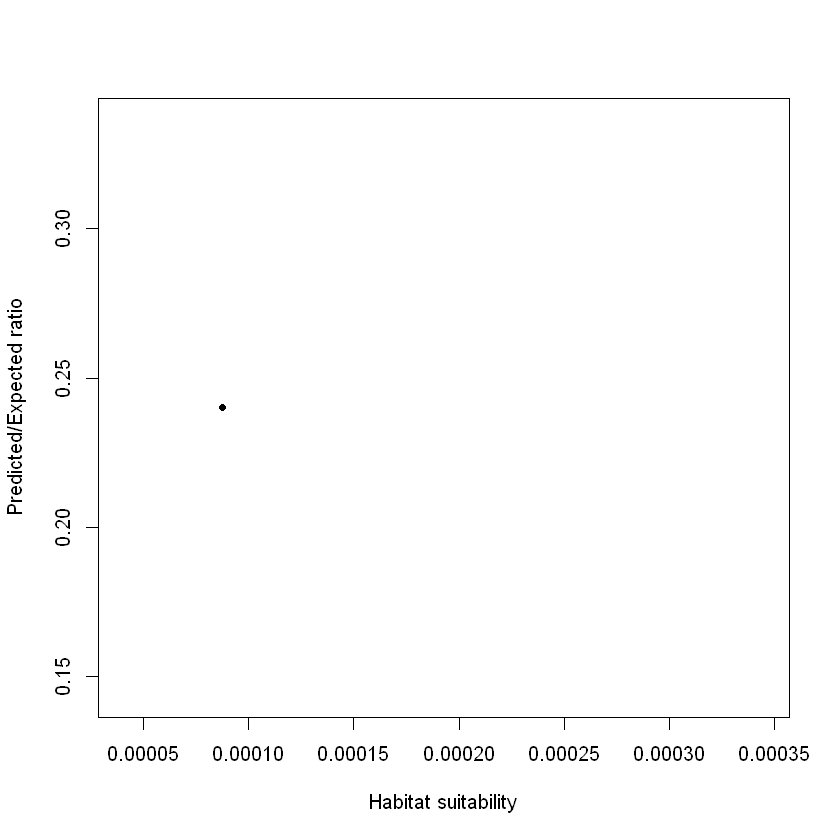

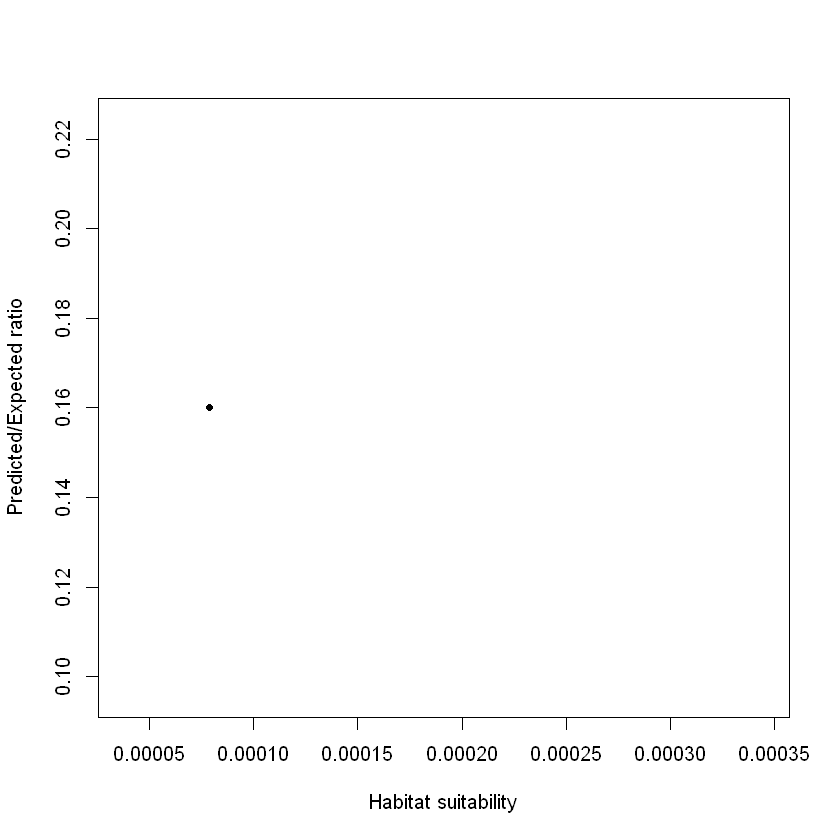

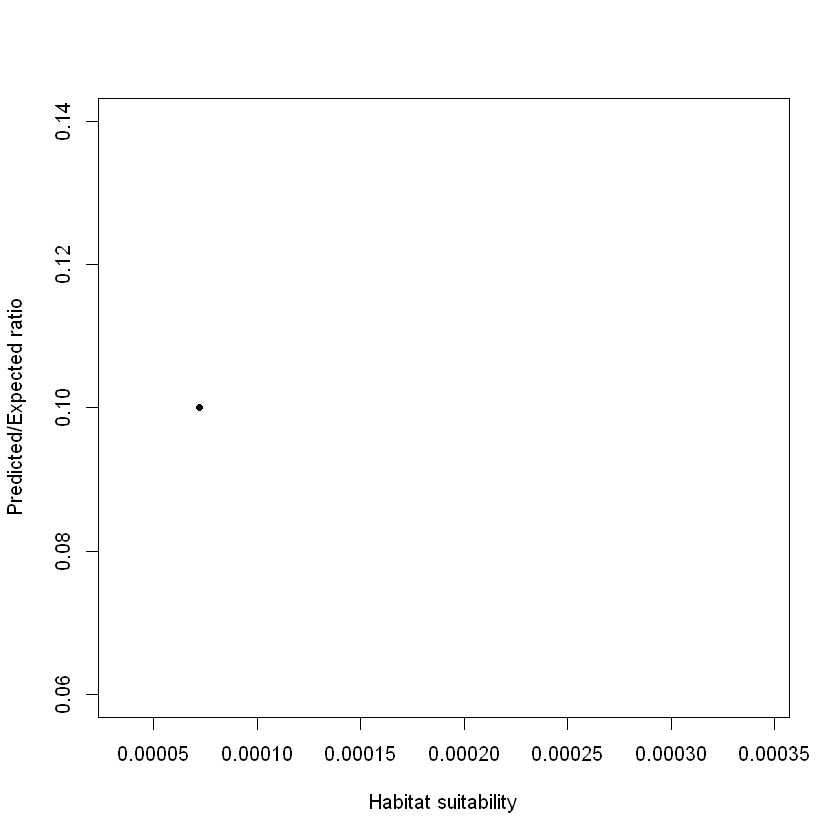

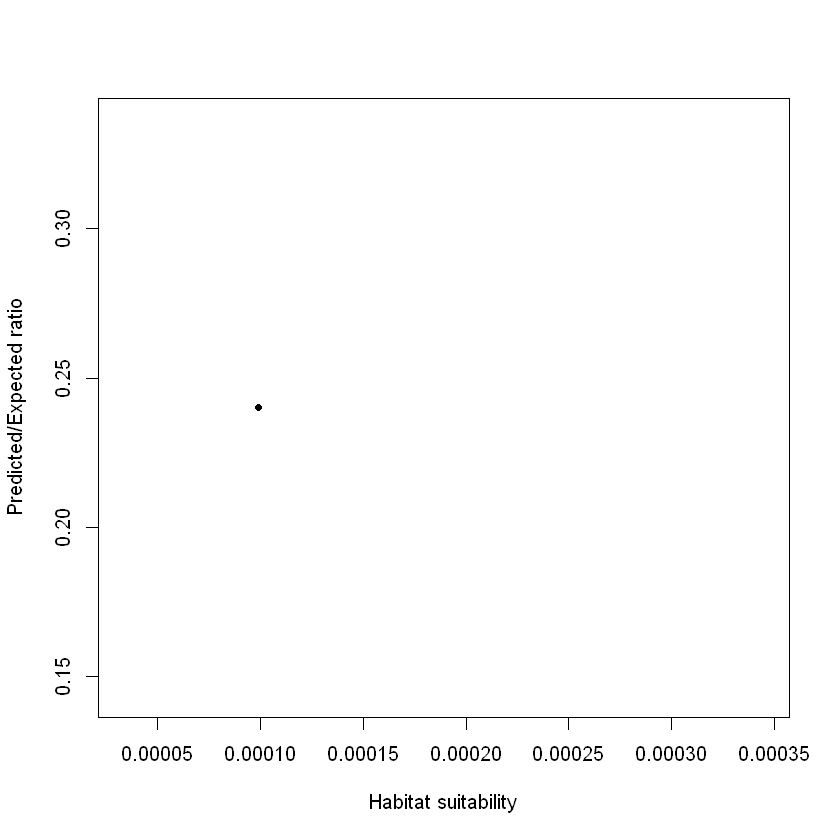

$`1`
[1]   1 Inf

$`2`
[1] 0.64  Inf  Inf

$`3`
[1] 0.5 Inf Inf Inf

$`4`
[1] 0.32  Inf  Inf  Inf  Inf

$`5`
[1]  Inf 0.28  Inf  Inf  Inf  Inf

$`6`
[1]  Inf 0.28  Inf  Inf  Inf  Inf  Inf

$`7`
[1]  Inf 0.24  Inf  Inf  Inf  Inf  Inf  Inf

$`8`
[1]  Inf 0.16  Inf  Inf  Inf  Inf  Inf  Inf  Inf

$`9`
 [1] Inf 0.1 Inf Inf Inf Inf Inf Inf Inf Inf

$`10`
 [1]  Inf  Inf 0.24  Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf

$`11`
 [1]  Inf  Inf 0.14  Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf



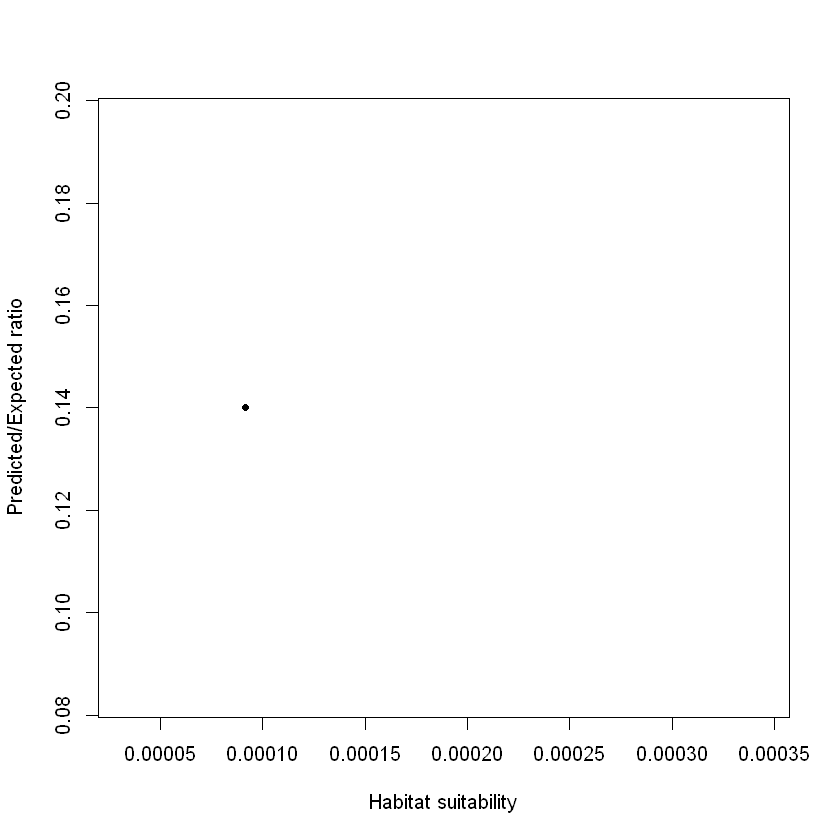

In [81]:
data$background <- background_value

# calculate boyce index
# Design an iterator to iterate over nclass values
nclass_values <- c(1,2, 3, 4, 5,6,7,8,9,10,11)

# Create an empty list to store the results
boyce_results <- list()

# Iterate over nclass values
for (nclass in nclass_values) {
    boyce_index <- ecospat.boyce(data$background, data$value, nclass = nclass, window.w = "default", PEplot = TRUE, rm.duplicate = TRUE, method = 'spearman')
    boyce_results[[as.character(nclass)]] <- boyce_index$F.ratio
}

# Print the results
print(boyce_results)
 

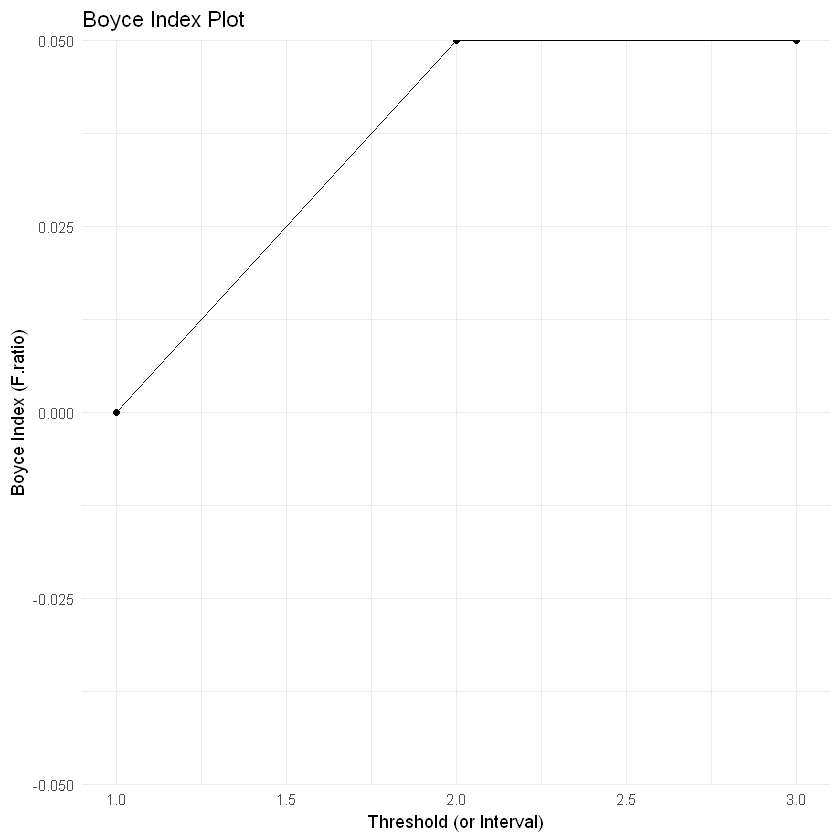

In [27]:
# 提取结果
f_ratio <- boyce_index$F.ratio
# 创建一个假设的区间序列，区间数与 F.ratio 的长度相同
thresholds <- seq_along(f_ratio)

# 创建数据框用于绘图
plot_data <- data.frame(Threshold = thresholds, F.ratio = f_ratio)

# 绘制 Boyce Index
ggplot(plot_data, aes(x = Threshold, y = F.ratio)) +
  geom_line() +
  geom_point() +
  labs(title = "Boyce Index Plot", x = "Threshold (or Interval)", y = "Boyce Index (F.ratio)") +
  theme_minimal()

#### 6# Interpret the Results

In [30]:
# Print the Boyce Index result
print(boyce_index$F.ratio[3])

# Optionally, you can plot the Boyce Index
plot(boyce_index)

[1] Inf


ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' is a list, but does not have components 'x' and 'y'
